In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn')
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Dataset

In [60]:
data = pd.read_csv('train.csv')

In [61]:
data.shape

(891, 12)

In [62]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Dealing with Duplicate Values

In [63]:
data.duplicated().sum()

0

# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

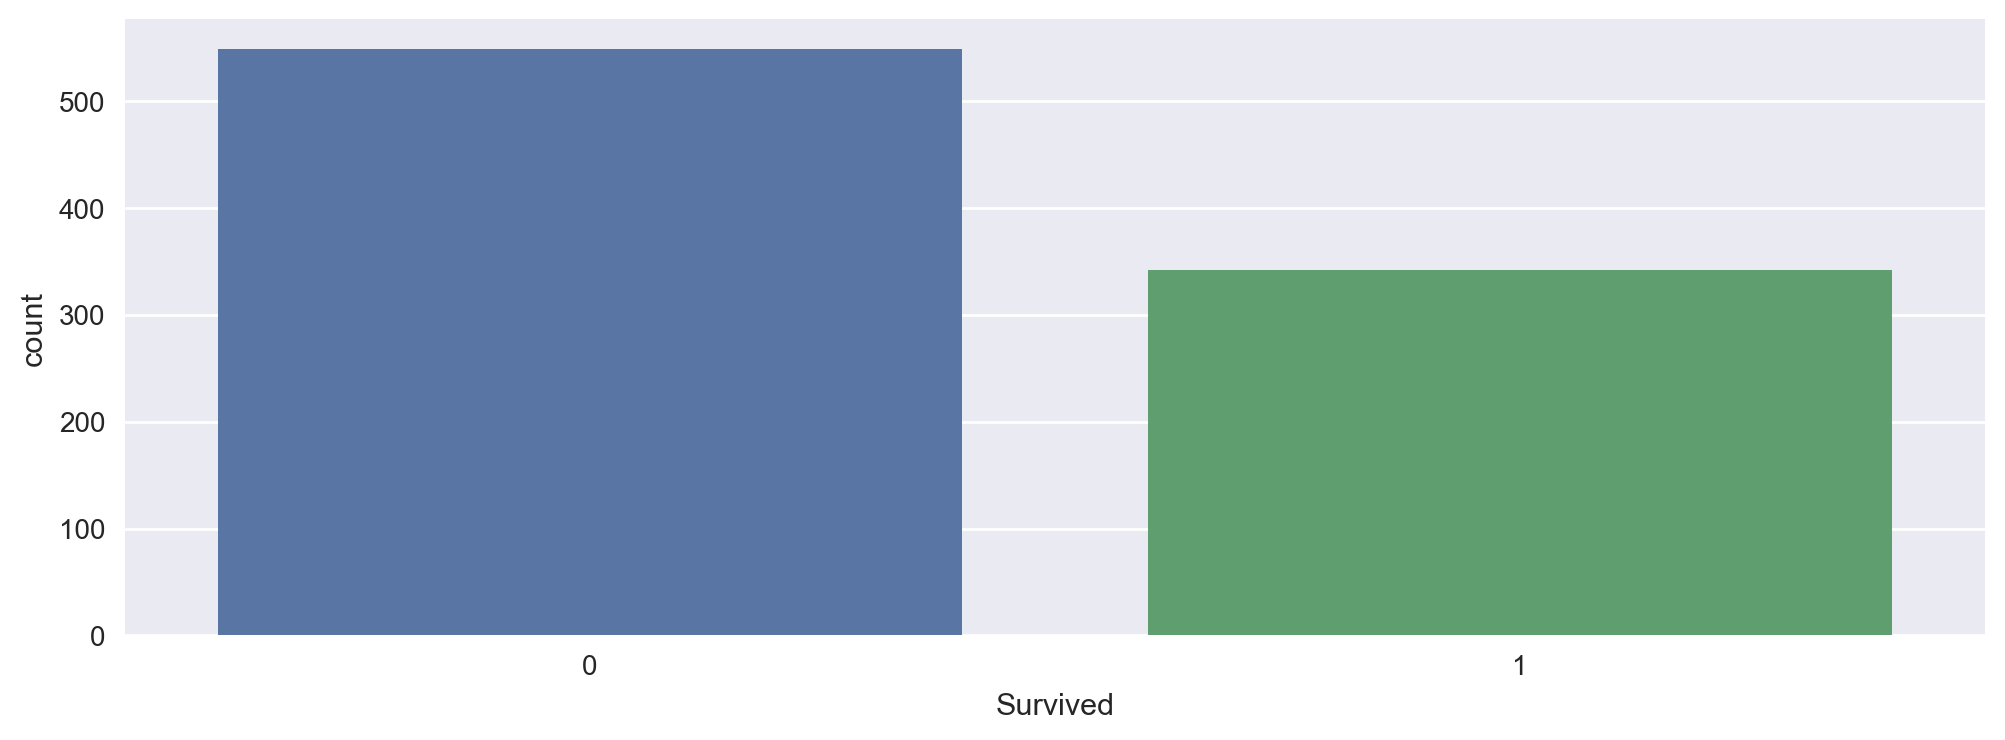

In [64]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',data = data)

# Pie Chart

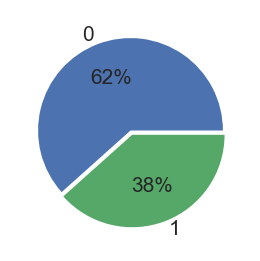

In [65]:
explode = [0, 0.05]
plt.figure(figsize = (9,2), dpi = 150)
plt.pie(data_num.Survived.value_counts(), labels = data_num.Survived.value_counts().index,autopct='%.0f%%',explode=explode )
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

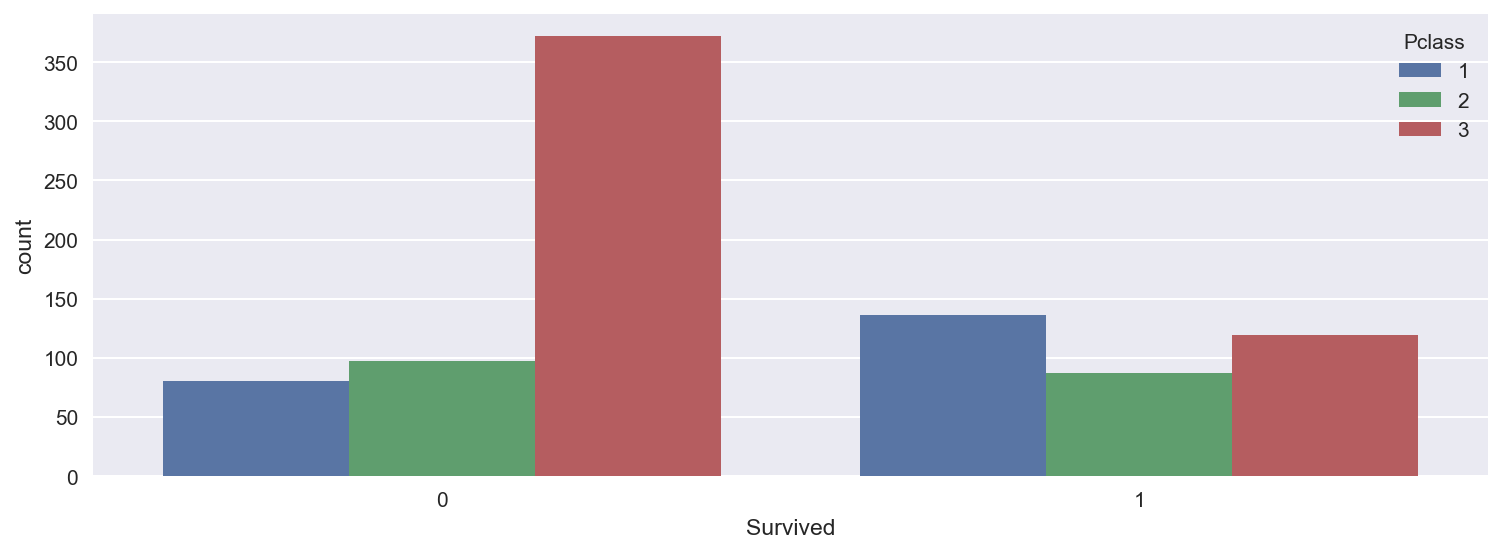

In [66]:
plt.figure(figsize = (12,4),dpi = 150)
sns.countplot('Survived',hue = 'Pclass', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

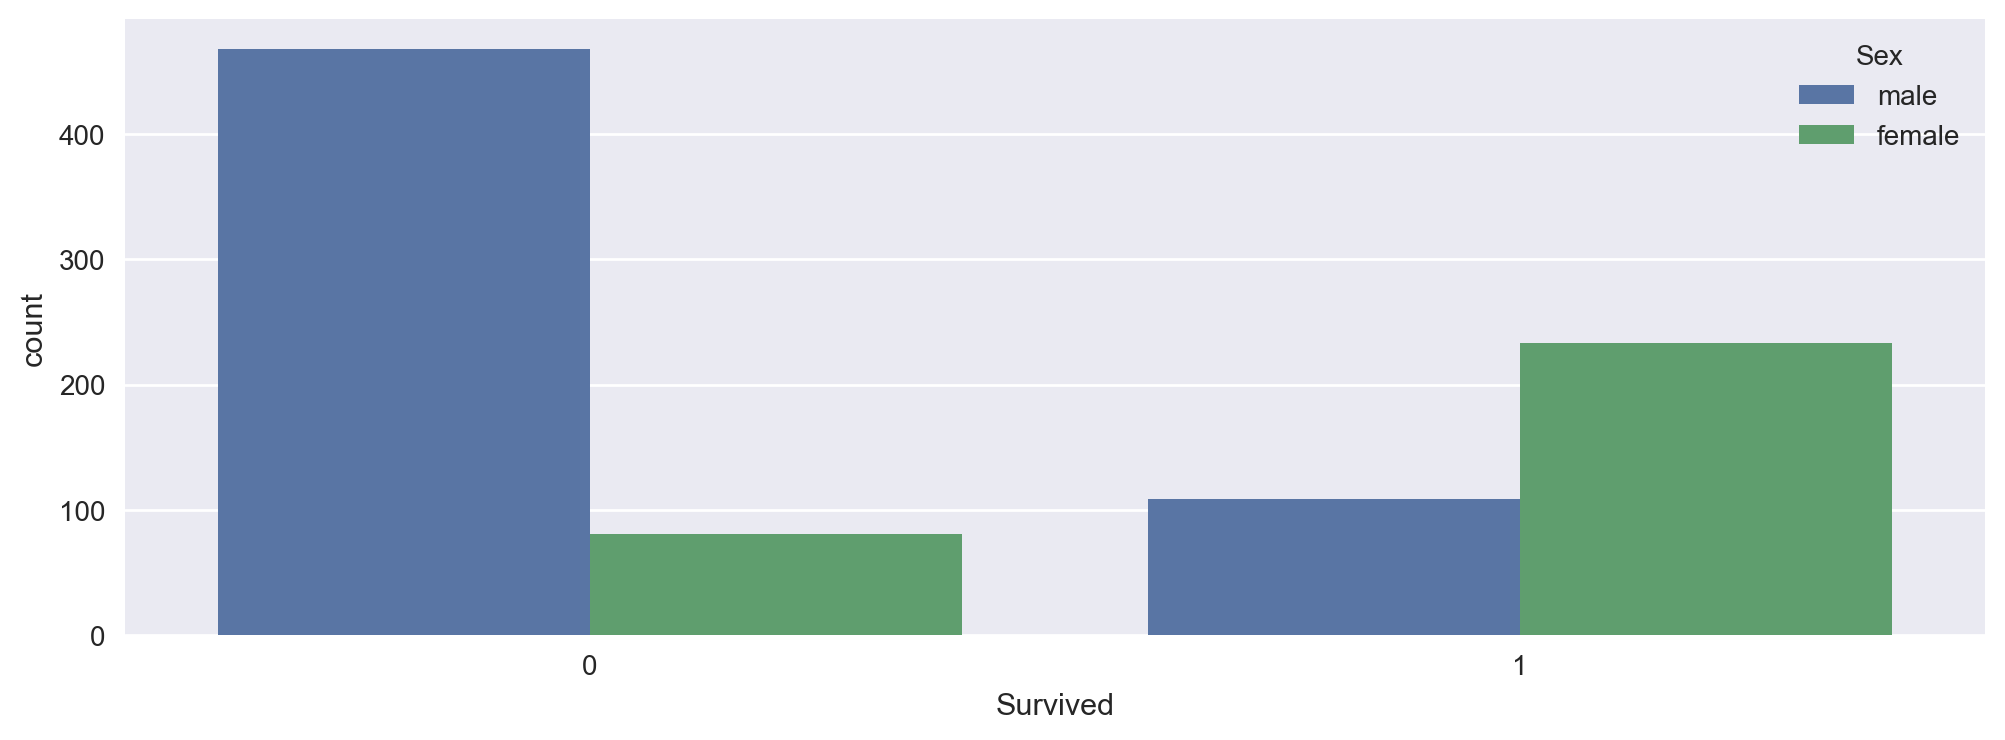

In [67]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',hue ='Sex',data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

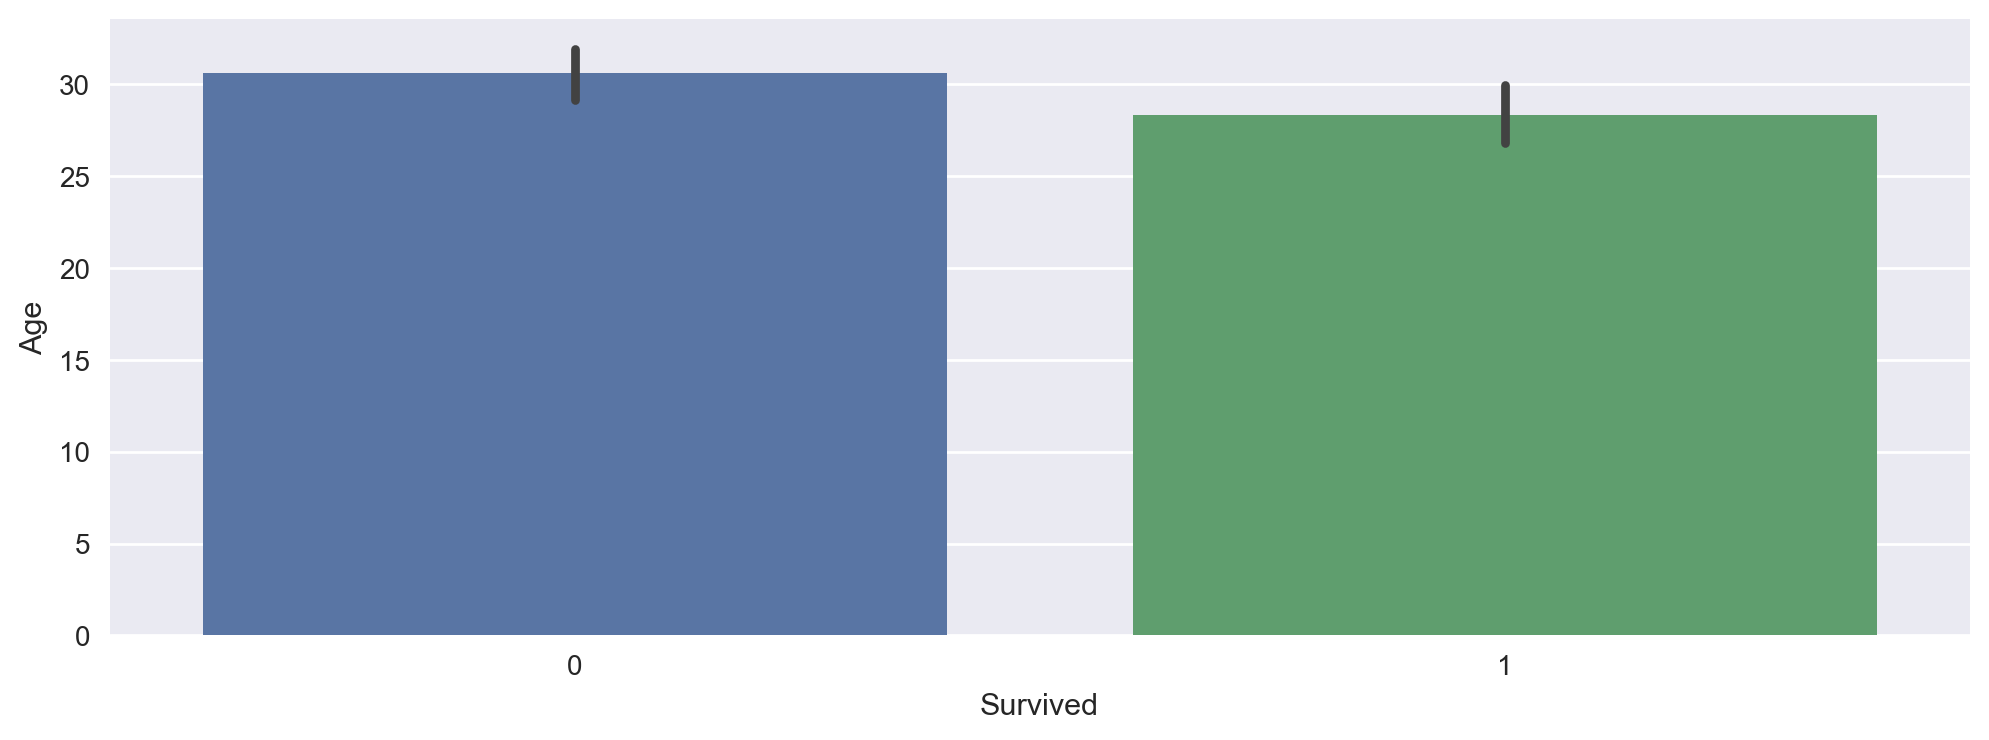

In [68]:
plt.figure(figsize = (12,4),dpi = 200)
sns.barplot('Survived','Age',data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

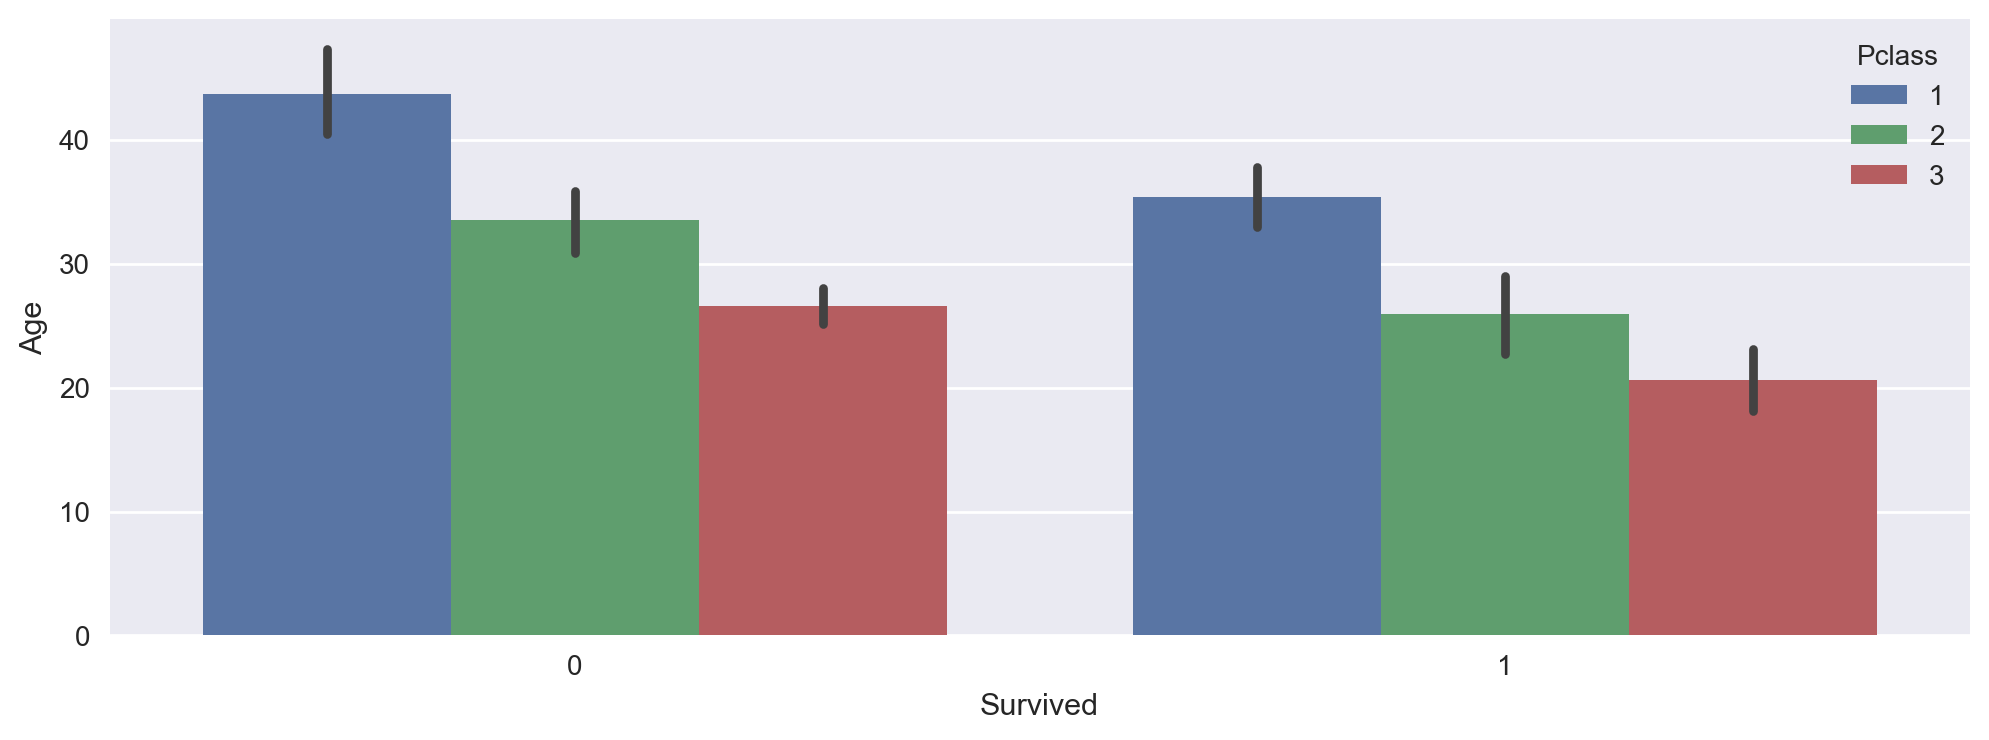

In [69]:
plt.figure(figsize = (12,4),dpi = 200)
sns.barplot('Survived','Age',data = data, hue = 'Pclass' )

<AxesSubplot:xlabel='Survived', ylabel='count'>

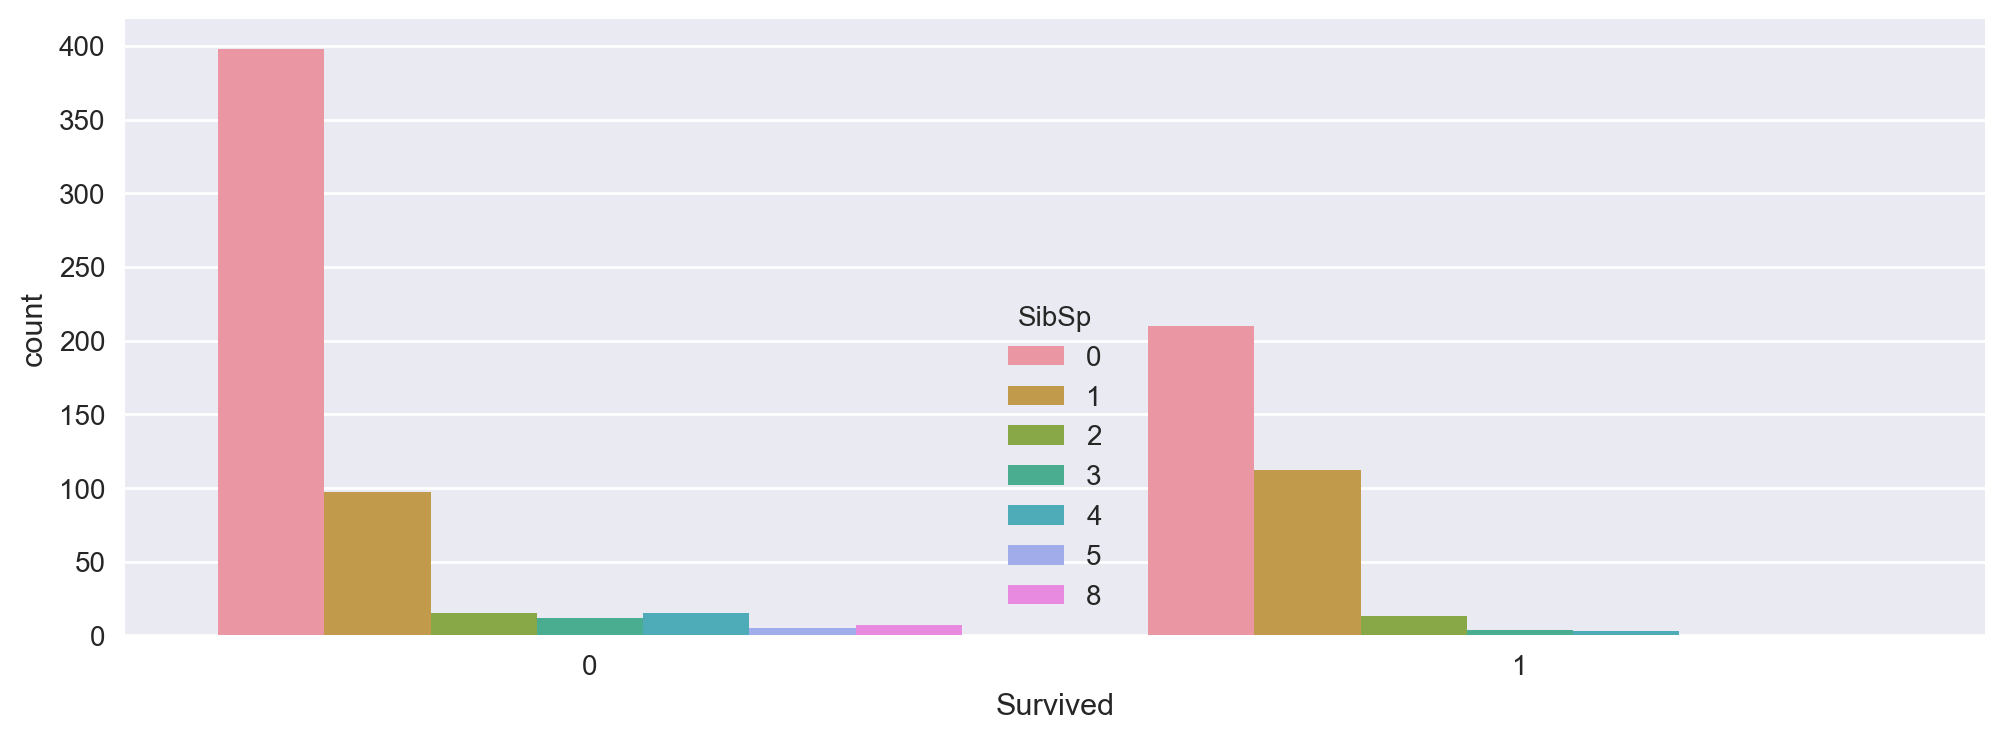

In [70]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',hue ='SibSp',data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

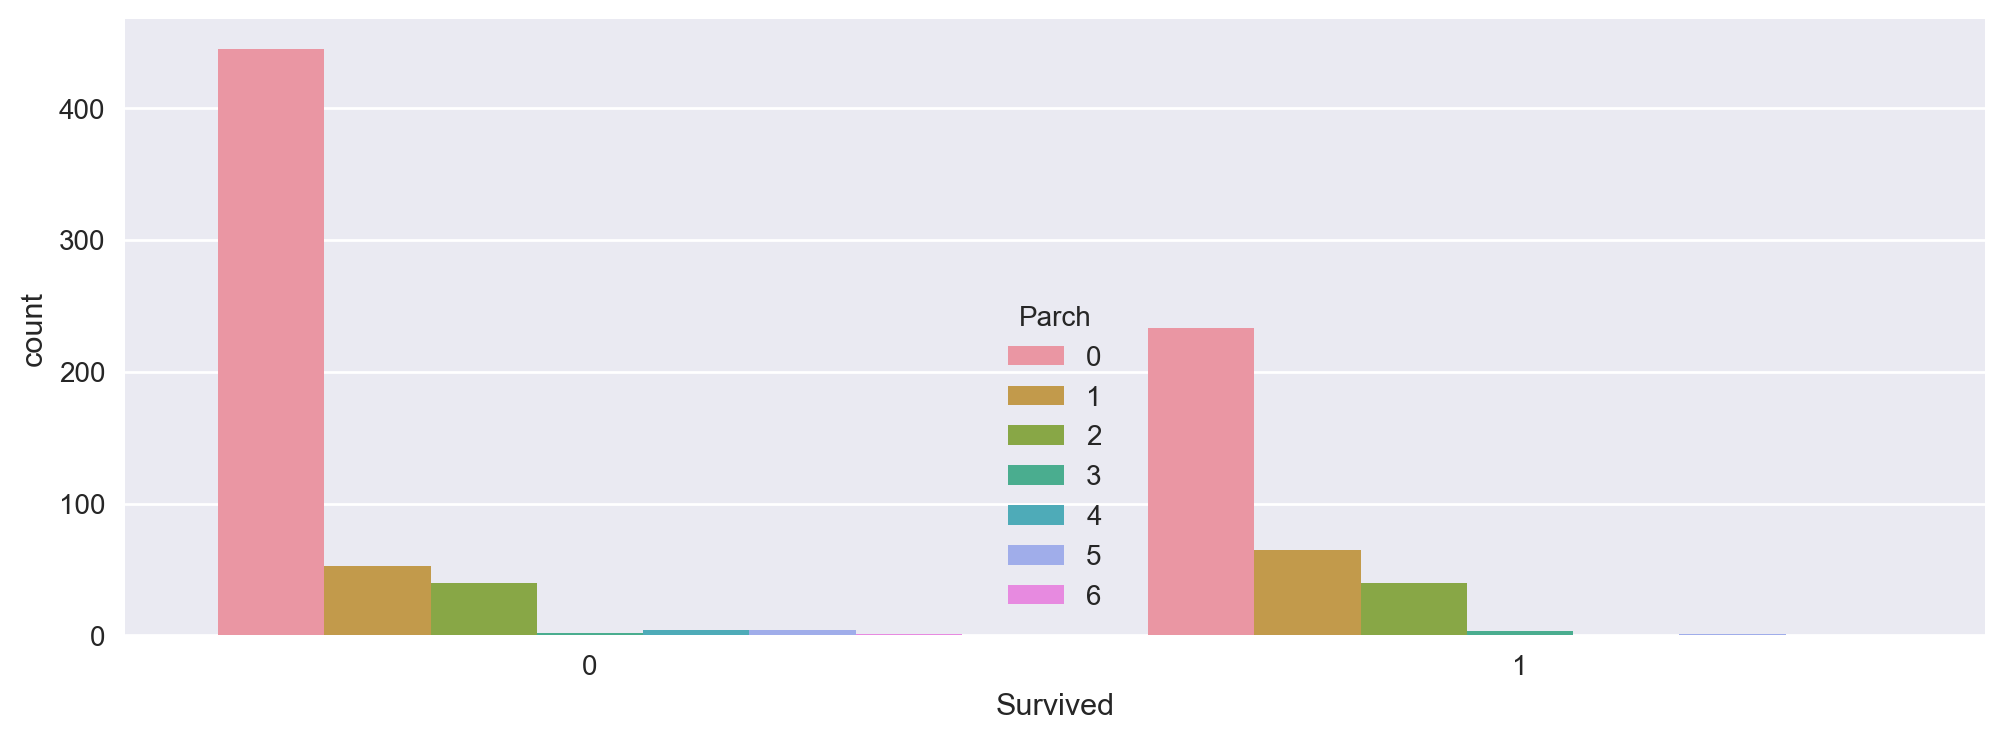

In [71]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',hue ='Parch',data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

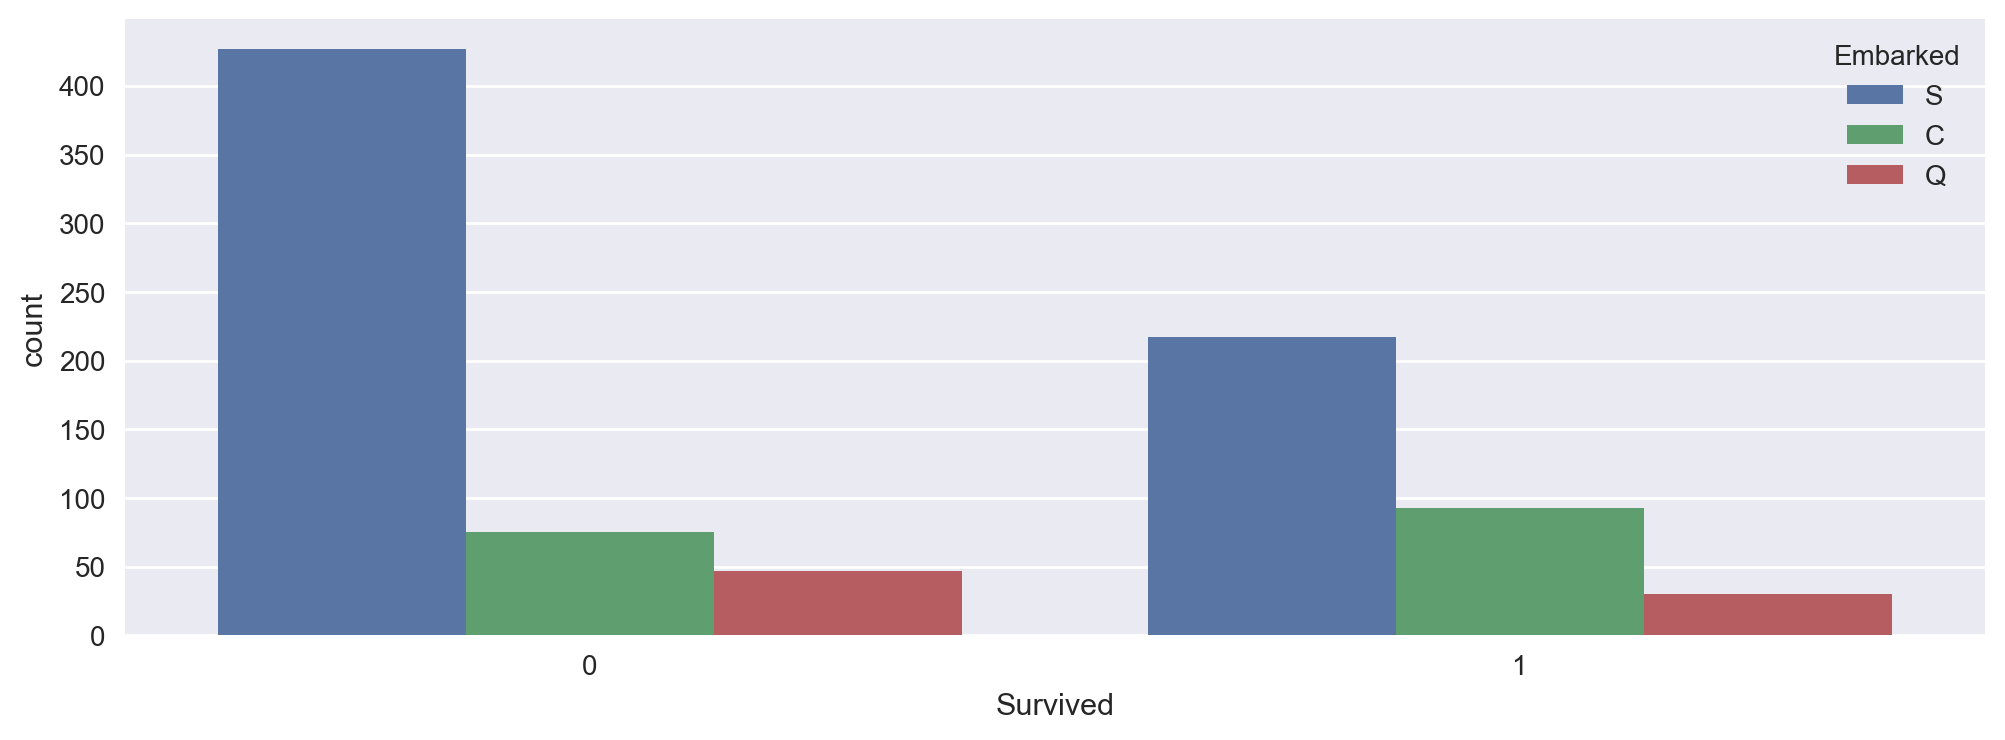

In [72]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',hue ='Embarked',data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

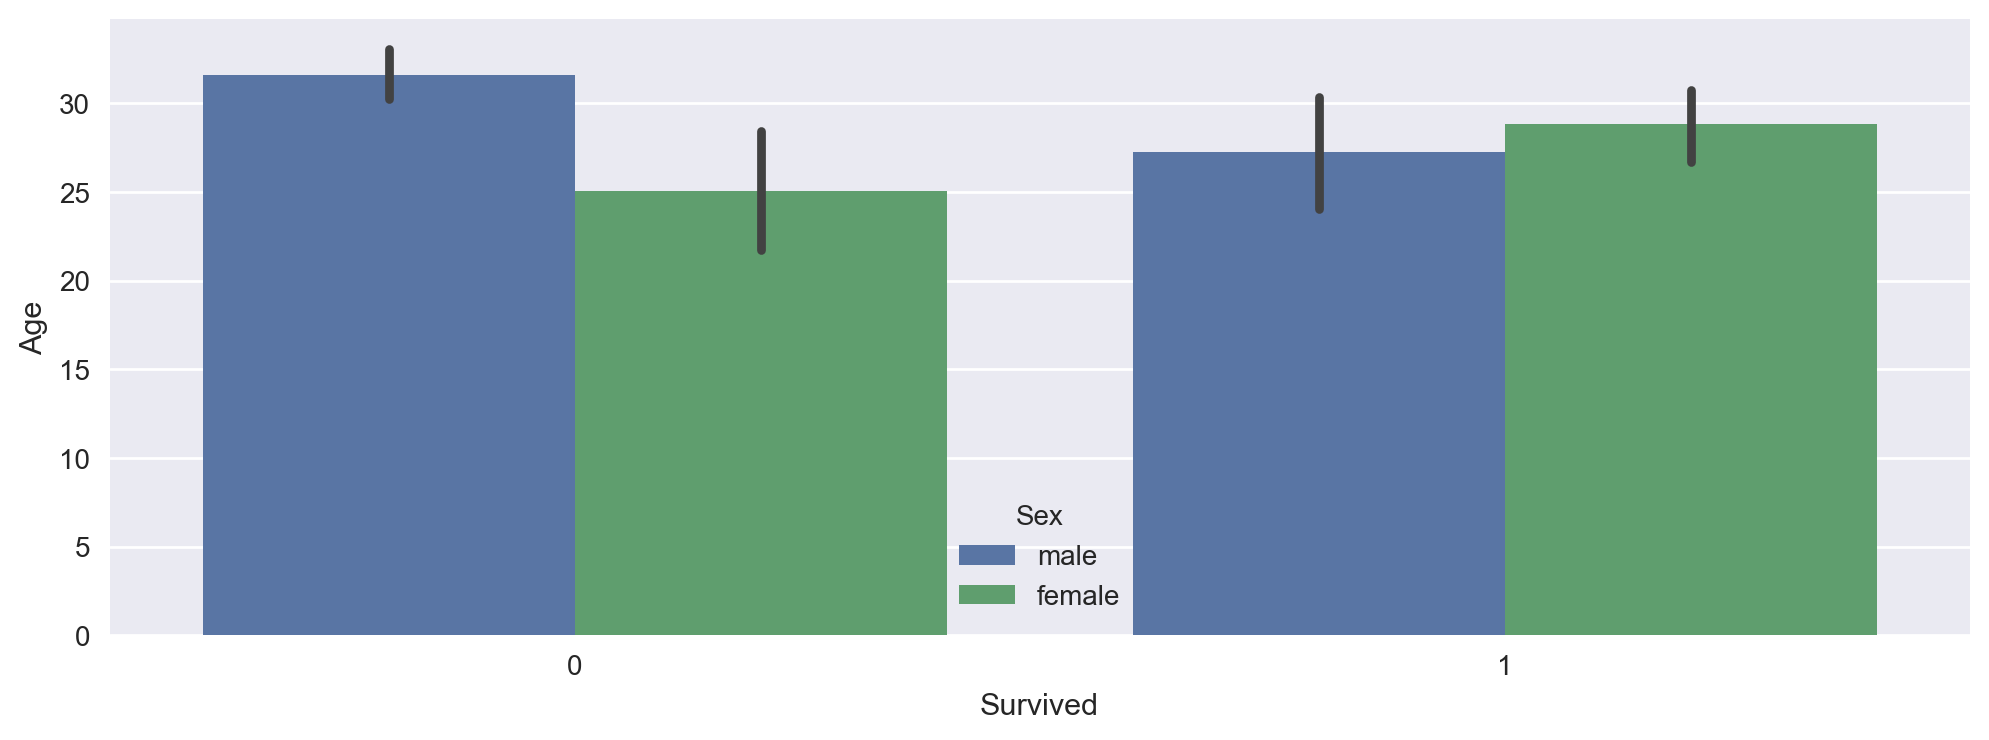

In [73]:
plt.figure(figsize = (12,4),dpi = 200)
sns.barplot('Survived','Age',data = data, hue = 'Sex' )

# Splitting Numerical and Categorical Values

In [74]:
data_num = data.select_dtypes(include = [np.number])
data_cat = data.select_dtypes(include = ['object'])

In [75]:
data_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [76]:
data_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


# Dealing with Null Values

In [77]:
data_num = data_num[['Survived','Pclass','Age','SibSp','Parch','Fare']]

In [78]:
data_num.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [79]:
data_num.Age.replace(np.nan, data_num.Age.mean(),inplace = True)

In [80]:
data_num.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Plotting Box Plot for all Numerical Columns

<AxesSubplot:>

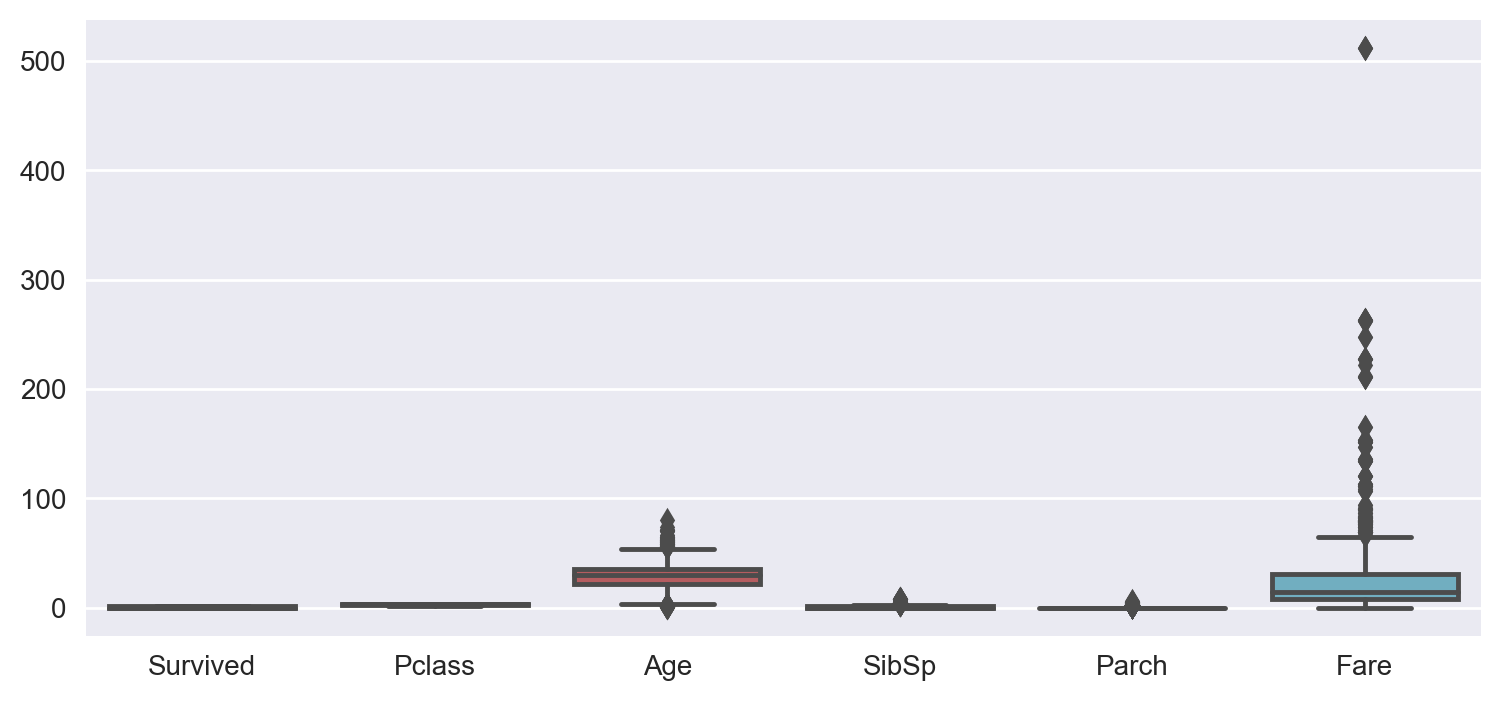

In [81]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(data = data_num)

# Removing the datapoints which are more than 75% and less than 25%

In [82]:
data_num.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='Fare'>

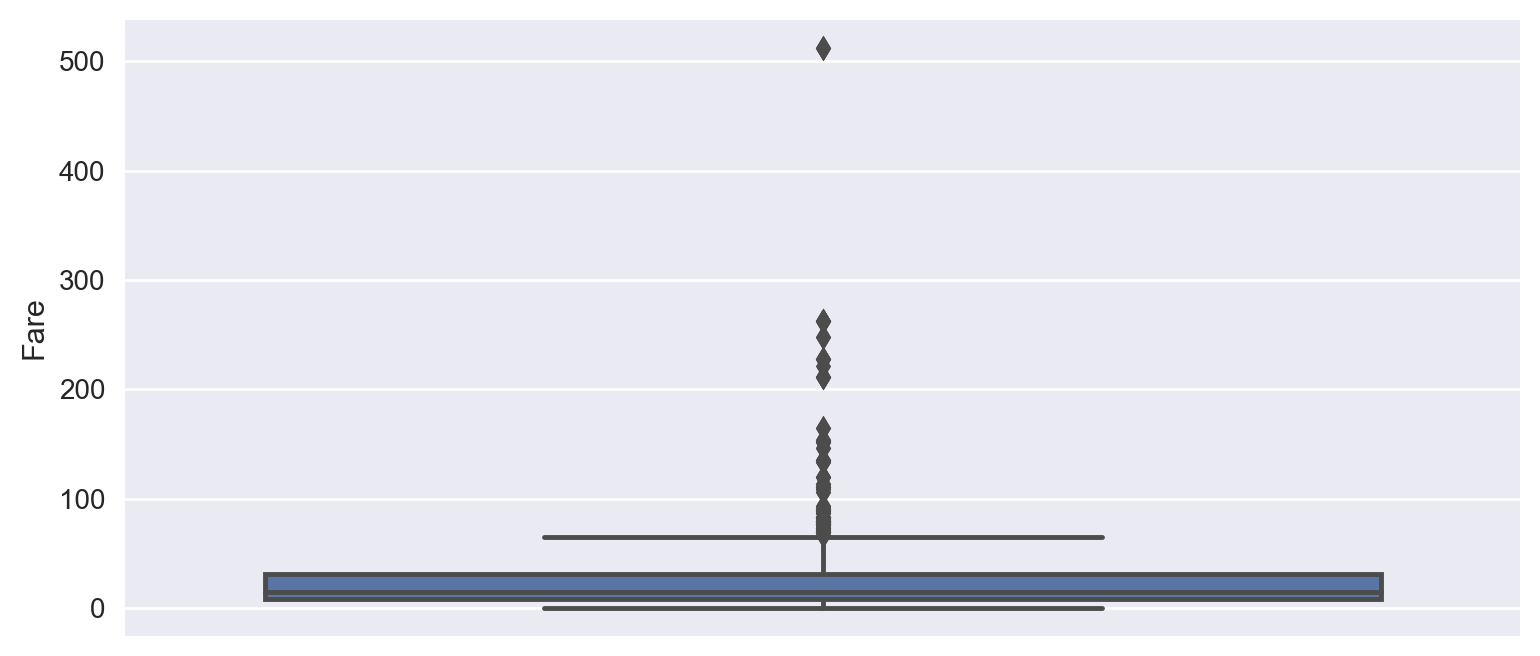

In [83]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_num.Fare)

In [84]:
data_f = data_num[(data_num['Fare']>7.91)&(data_num['Fare']<31.00)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='Fare'>

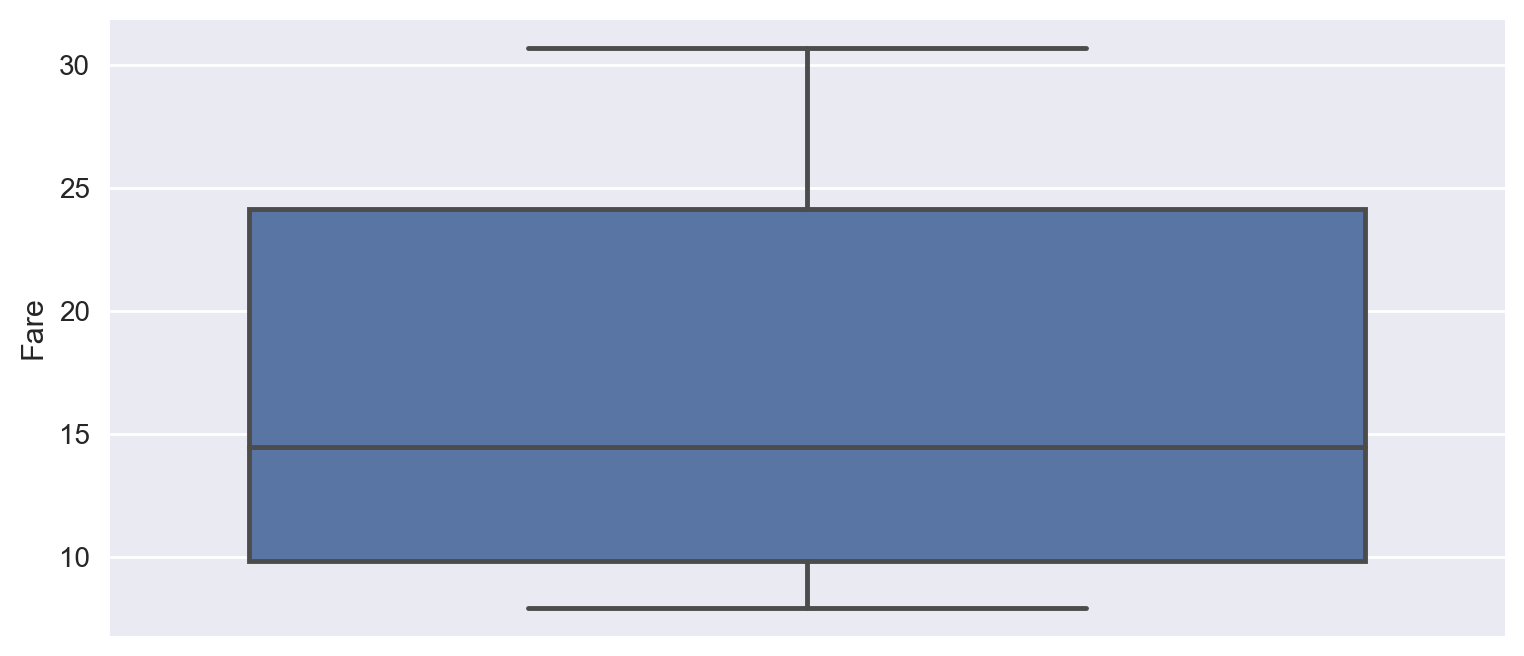

In [85]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_f.Fare)

# MinMax Scaler

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc=scaler.fit(data_f)
data_scaler= sc.fit_transform(data_f)

<AxesSubplot:>

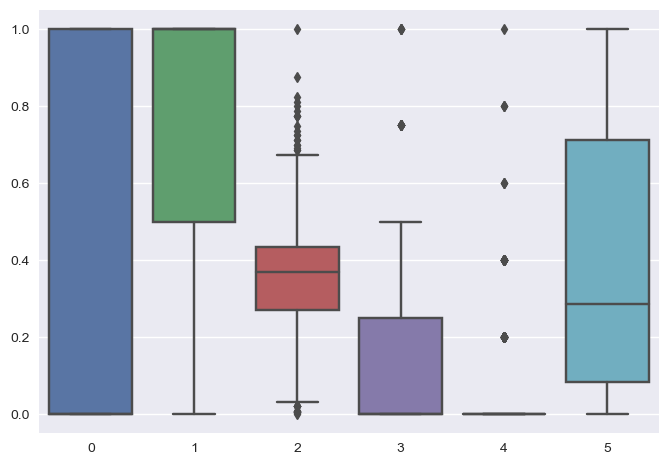

In [87]:
sns.boxplot(data=data_scaler)

# Categorical Columns

In [88]:
data_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [89]:
data_cat.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [90]:
data_cat.Cabin.replace(np.nan,data_cat.Cabin.mode()[0],inplace = True)
data_cat.Embarked.replace(np.nan, data_cat.Embarked.mode()[0], inplace = True)

In [91]:
data_cat.isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

# Label Encoding

In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_cat=data_cat.apply(encoder.fit_transform)

In [93]:
data_cat

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,47,2
1,190,0,596,81,0
2,353,0,669,47,2
3,272,0,49,55,2
4,15,1,472,47,2
...,...,...,...,...,...
886,548,1,101,47,2
887,303,0,14,30,2
888,413,0,675,47,2
889,81,1,8,60,0


In [94]:
data_f.shape

(443, 6)

In [95]:
data_cat.shape

(891, 5)

In [96]:
data_cat=data_cat.loc[data_f.index.values,:]

In [97]:
data_cat.shape

(443, 5)

# Concatenate Numerical Values and Categorical Values

In [98]:
data_final=pd.concat([data_f,data_cat],axis=1)

In [99]:
data_final

,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
2,1,3,26.000000,0,0,7.9250,353,0,669,47,2
4,0,3,35.000000,0,0,8.0500,15,1,472,47,2
5,0,3,29.699118,0,0,8.4583,554,1,275,47,1
7,0,3,2.000000,3,1,21.0750,624,1,395,47,2
8,1,3,27.000000,0,2,11.1333,412,0,344,47,2
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,684,0,480,47,1
886,0,2,27.000000,0,0,13.0000,548,1,101,47,2
887,1,1,19.000000,0,0,30.0000,303,0,14,30,2
888,0,3,29.699118,1,2,23.4500,413,0,675,47,2
